In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d0 = pd.read_csv('mnist_train.csv')

#print(d0)

l=d0['label']

d=d0.drop('label',axis=1)

print(d.head())
print(l.head())
print(d.shape)
print(l.shape)

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0   

In [9]:
from sklearn.preprocessing import StandardScaler
standardised_data = StandardScaler().fit_transform(d)
print(standardised_data.shape)

(42000, 784)


In [10]:
sample_data = standardised_data
from sklearn import decomposition
pca = decomposition.PCA()

In [11]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

print(pca_data.shape)
pca_data = np.vstack((pca_data.T,l)).T

(42000, 2)


(42000, 3)


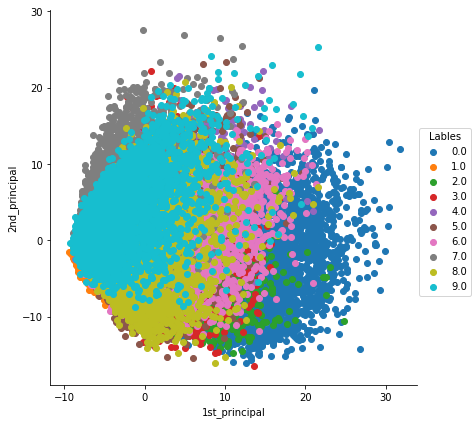

In [12]:
import seaborn as sn
print(pca_data.shape)
pca_dataframe = pd.DataFrame(pca_data,columns = ("1st_principal","2nd_principal","Lables"))

sn.FacetGrid(pca_dataframe , hue = "Lables", size=6).map(plt.scatter ,"1st_principal","2nd_principal").add_legend()

plt.show()

In [30]:
data = d.head(1000)
label= l.head(1000)
#data = standardised_data[0:1000,:]
#label = l[0:1000]

In [31]:
print(data.shape)
print(label.shape)

(1000, 784)
(1000,)


In [32]:
from sklearn.preprocessing import StandardScaler

standardised_data = StandardScaler().fit_transform(data)
print(standardised_data.shape)

(1000, 784)


In [33]:
from sklearn.manifold import TSNE

model = TSNE(n_components = 2, random_state = 0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(standardised_data)

In [34]:
print(tsne_data.shape)
tsne_data = np.vstack((tsne_data.T,label)).T
print(tsne_data.shape)

(1000, 2)
(1000, 3)


In [35]:
#tsne_data=tsne_data[:,0:3]
print(tsne_data.shape)
print(tsne_data)

(1000, 3)
[[ 29.62181091  -5.13043165   1.        ]
 [-33.7644043   26.47477341   0.        ]
 [  8.88824844  -0.98760664   1.        ]
 ..., 
 [  1.79043925 -41.56043243   9.        ]
 [ 35.27253342  21.47627831   6.        ]
 [-19.92366791 -26.28704071   4.        ]]


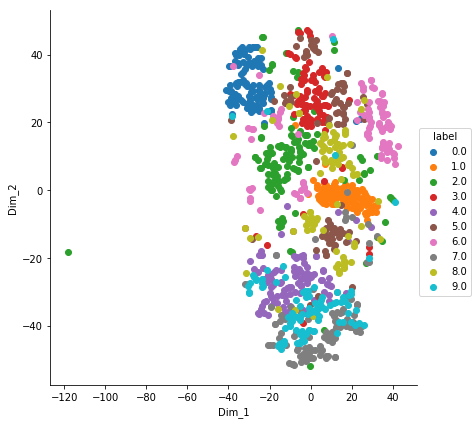

In [36]:
tsne_dataframe = pd.DataFrame(data=tsne_data , columns= ("Dim_1","Dim_2","label"))

sn.FacetGrid( tsne_dataframe,hue ="label",size = 6).map(plt.scatter , "Dim_1","Dim_2").add_legend()

plt.show()